Importing all required libreries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq
import cv2
import random as rn
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder as le
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from matplotlib import style
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid' ,color_codes=True)



In [ ]:
#Avoid OOM error by setting GPU Memory Consumption Growth

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

Importing data 

In [ ]:
def make_train_data(label,DIR):
    for img in tq(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [ ]:
X=[] #contains images as a array
Z=[] #contains the labels
IMG_SIZE=100


nor='/content/drive/MyDrive/data set/normal'
pot='/content/drive/MyDrive/data set/potholes'

make_train_data('NORMAL',nor)
make_train_data('POTHOLES',pot)

  0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/329 [00:00<?, ?it/s]

Ploting images

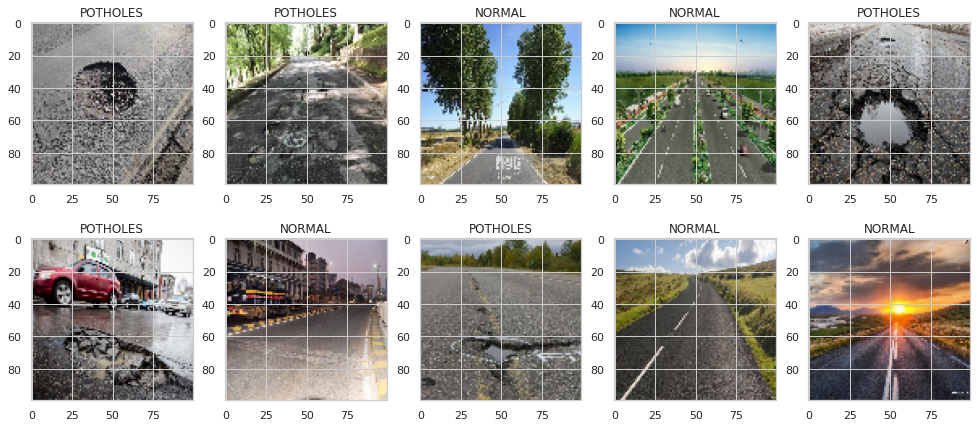

In [ ]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Y=[] # binary representation of labels
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)

X=np.array(X)
X=X/255.0

In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (680, 100, 100, 3)
Shape of Y: (680, 2)


Spliting and training the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)


Importing CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import time

NAME= f'prediction-{int(time.time())}'



Creating CNN layers

In [ ]:
model= Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
#model.add(Dense(2, activation='softmax'))

Model compile

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary ()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

Model implimenting

In [ ]:

history=model.fit(X_train, Y_train, epochs= 10, validation_split=0.1, batch_size=32,callbacks=[tensorboard_callback] )

Epoch 1/10
16/16 [==============================] - 13s 742ms/step - loss: 0.8238 - accuracy: 0.5726 - val_loss: 0.6617 - val_accuracy: 0.4364
Epoch 2/10
16/16 [==============================] - 12s 741ms/step - loss: 0.5239 - accuracy: 0.7526 - val_loss: 0.4640 - val_accuracy: 0.8364
Epoch 3/10
16/16 [==============================] - 12s 738ms/step - loss: 0.3642 - accuracy: 0.8548 - val_loss: 0.3756 - val_accuracy: 0.8364
Epoch 4/10
16/16 [==============================] - 12s 762ms/step - loss: 0.2686 - accuracy: 0.8855 - val_loss: 0.2201 - val_accuracy: 0.9455
Epoch 5/10
16/16 [==============================] - 12s 753ms/step - loss: 0.2049 - accuracy: 0.9039 - val_loss: 0.1930 - val_accuracy: 0.9455
Epoch 6/10
16/16 [==============================] - 15s 967ms/step - loss: 0.3446 - accuracy: 0.8425 - val_loss: 0.3056 - val_accuracy: 0.9091
Epoch 7/10
16/16 [==============================] - 13s 767ms/step - loss: 0.2304 - accuracy: 0.9162 - val_loss: 0.2637 - val_accuracy: 0.9455

Calculating accuracy and loss

In [ ]:
loss,accuracy= model.evaluate(X_test, Y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))
print('Test loss {:2.2f}%'.format(loss*100))

5/5 [==============================] - 1s 137ms/step - loss: 0.2230 - accuracy: 0.9118
Test accuracy: 91.18%
Test loss 22.30%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the graphs

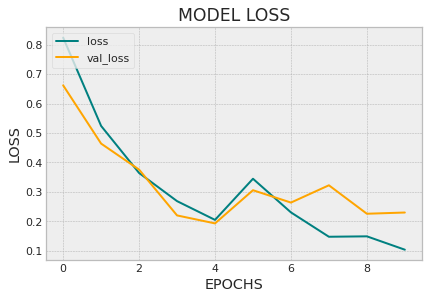

In [ ]:
plt.style.use('bmh')
fig=plt.figure()
plt.plot(history.history['loss'],color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.title('MODEL LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='upper left')
plt.show()

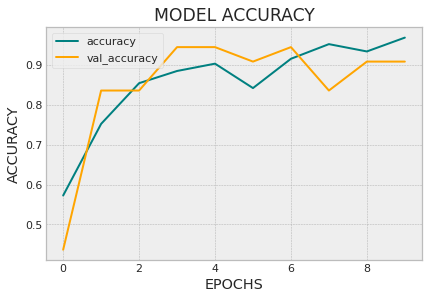

In [ ]:
plt.style.use('bmh')

fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='upper left')
plt.show()


Predicting the model

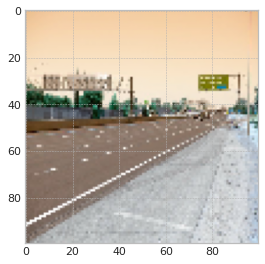

1/1 [==============================] - 0s 280ms/step
[[1. 0.]]
Plain Road


In [ ]:
import random
indx2= random.randint(0, len(Y_test))
plt.imshow(X_test[indx2, :])
plt.show()

Y_pred= np.round(model.predict(X_test[indx2, :].reshape(1,100,100,3)))
print(Y_pred)
if Y_pred[0][0] == 1:
  print("Plain Road")
else:
    print("Pothole Road")

END
